<a href="https://colab.research.google.com/github/elsedore/data-analytics/blob/main/Airbnb_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

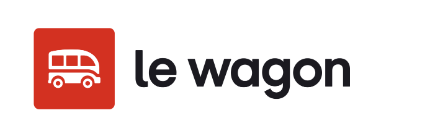

# Inside Airbnb

## Walking through the data with Python


## Import libraries

In [ ]:
# Import the libraries we are going to use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Import

**IMPORTANT!**
Before starting download the [csv](https://drive.google.com/file/d/14USM7iXqZhMekUpGQkuTphqXQkLs7dC3/view) that we are going to use during the workshop, you must save it in a folder on your Google Drive where your notebook will also be located

In [5]:
# Load the dataset
data = pd.read_csv('/./data_cleaned.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Let's check the data

In [6]:
# Display the first few rows of the dataframe to understand its structure
data.head(5)
#YOUR CODE

,id,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,host_id,host_response_time,review_scores_rating
0,3109,Observatoire,48.83191,2.31870,Entire home/apt,150.0,4,2019-10-24,0.05,1,327,3631,within a few hours,5.00
1,5396,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,146.0,374,2023-12-11,2.12,2,0,7903,within an hour,4.59
2,7397,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,140.0,343,2023-11-16,2.22,7,198,2626,within an hour,4.73
3,7964,Opéra,48.87417,2.34245,Entire home/apt,180.0,5,2015-09-14,0.03,1,25,22155,NaN,4.80
4,9359,Louvre,48.86006,2.34863,Entire home/apt,75.0,0,NaN,NaN,1,185,28422,NaN,NaN


In [16]:
#Check the number of rows and columns. Use .shape
data.shape

(74329, 14)

In [14]:
#What type of data do we get while using .shape? use .type()
data.dtypes

,0
id,int64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64
number_of_reviews,int64
last_review,object
reviews_per_month,float64
calculated_host_listings_count,int64


In [17]:
#If we wanted to only show the number of rows, how could I do it? use .shape
data.shape[0]

74329

In [22]:
# To have more information about each column we can use .info()
data['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 74329 entries, 0 to 74328
Series name: price
Non-Null Count  Dtype  
--------------  -----  
67108 non-null  float64
dtypes: float64(1)
memory usage: 580.8 KB


In [1]:
# or even .describe()
data.describe()

NameError: name 'data' is not defined

## Data Cleaning

First let's check the temporality of the data we work on

In [23]:
# Convert 'last_review' to datetime format and find the oldest and most recent dates

data['last_review'] = pd.to_datetime(data['last_review'])


# Look for the first and last date recorded in the dataframe using .max() .min()

#YOUR CODE

Check for missing values in key columns

In [31]:
# Check for missing values in key columns
data.isna().sum().sort_values()
#YOUR CODE

,0
id,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
number_of_reviews,0
availability_365,0
calculated_host_listings_count,0
host_id,0
price,7221


List all column names to ensure accurate references in analysis scripts

In [33]:
# List all column names to ensure accurate references in analysis scripts
data.info()
#YOUR CODE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74329 entries, 0 to 74328
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              74329 non-null  int64         
 1   neighbourhood                   74329 non-null  object        
 2   latitude                        74329 non-null  float64       
 3   longitude                       74329 non-null  float64       
 4   room_type                       74329 non-null  object        
 5   price                           67108 non-null  float64       
 6   number_of_reviews               74329 non-null  int64         
 7   last_review                     56438 non-null  datetime64[ns]
 8   reviews_per_month               56438 non-null  float64       
 9   calculated_host_listings_count  74329 non-null  int64         
 10  availability_365                74329 non-null  int64         
 11  ho

Do you want to keep all columns?

In [ ]:
# Delete the columns that we do not want to keep
column_to_drop= ['longittue', 'latitude']

#YOUR CODE

## Exploratory Data Analysis (EDA)

#### **Room Type Distribution**

Airbnb hosts can list entire homes/apartments, private, shared rooms, and more recently hotel rooms.

 How many types of accomodation do we have in the dataset?

In [42]:
# Calculate the number of listings per room type
room_listing = data['room_type'].value_counts(normalize=True).round(4)*100

In [51]:
# Calculate the distribution of listings by room type
room_listing.value_counts()


,count
proportion,
87.00,1
11.26,1
1.11,1
0.63,1


<Axes: xlabel='room_type', ylabel='proportion'>

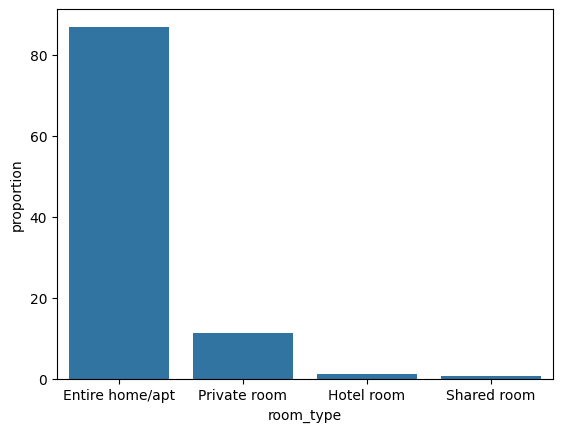

In [46]:
# Plotting the distribution of room types
sns.barplot(room_listing)


In [ ]:
# Calculate the number of unique neighborhoods


In [ ]:
# Calculate listings count for each neighbourhood and sort in ascending order by count



#### **Pricing**

What are the revenue and occupancy rates across different scopes? Can we identify pricing trends?

How much does the average person pay to stay in Paris?

In [52]:
#Calculating the mean rental price
float(data['price'].mean())

221.16173928592715

Do you consider it is a good way to approximate the average price? Could we do it in a better way?

In [58]:
# Grouping the data by neighborhood and calculate the average price

data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head()

,price
neighbourhood,
Élysée,386.641818
Passy,382.067933
Palais-Bourbon,330.194888
Louvre,325.465902
Luxembourg,287.169570


<Axes: xlabel='neighbourhood'>

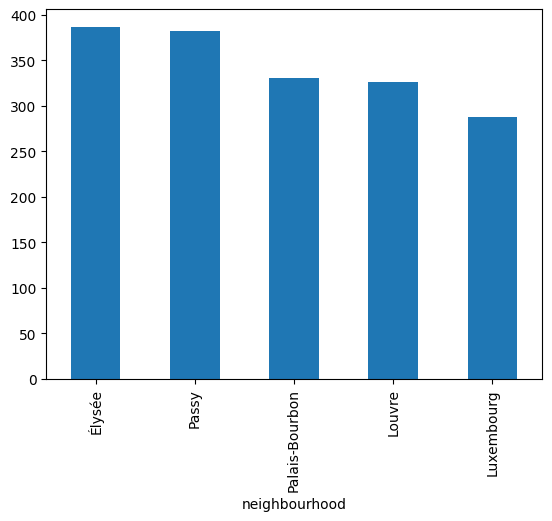

In [63]:
# Plotting the average price per neighborhood
data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head().plot(kind='bar')


Let's calculate the average price by room type

<Axes: xlabel='room_type'>

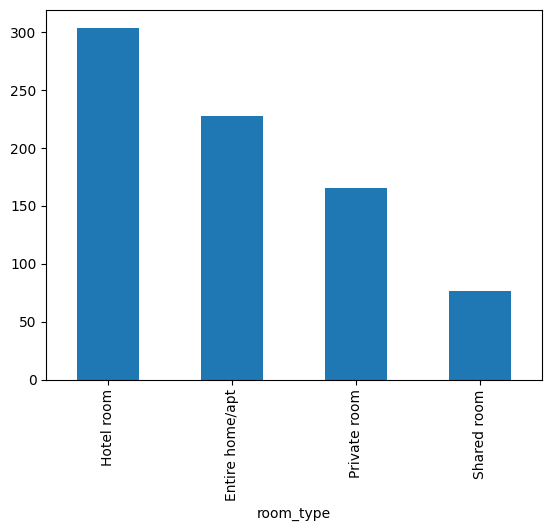

In [64]:
# Group by 'room_type' and calculate the average price
data.groupby('room_type')['price'].mean().sort_values(ascending=False).head().plot(kind='bar')

# Rename columns for clarity


#### **Identifying High-Performing Listings**

Which listings in Airbnb's portfolio perform the best in terms of occupancy rates, revenue generation, and guest satisfaction?

**Host revenue generation**

Some Airbnb hosts have multiple listings.

A host may list separate rooms in the same apartment, or multiple apartments or homes available in their entirety.

Hosts with multiple listings are more likely to be running a business, are unlikely to be living in the property.

Imagine that we want to know how much the 10 hosts that earn the most per year earn.

In [69]:
# Create a new column 'potential_revenue' and calculate the potential annual revenue for each listing

data['potential_revenue'] = data['price'] * data['availability_365']

# Now, group by 'host_id' and sum up the potential revenue
data.groupby('host_id')['potential_revenue'].sum()

# Display the results


,potential_revenue
host_id,
275,44000.0
2626,106961.0
3631,49050.0
6792,170904.0
7903,480.0
...,...
550193168,403500.0
550245039,21021.0
550339518,0.0


**Distribution of Listings per Host**

Apartment - how many apartments does each host own?

We'll use the *host_id* and *id*  to count how many listings each host manages.

In [ ]:
# Counting listings per host



# For a more informative chart, we limit the visualization to the top 10 hosts


In [70]:
data.columns

Index(['id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'host_id',
       'host_response_time', 'review_scores_rating', 'potential_revenue'],
      dtype='object')

What if we create a combined performance metric based on review scores and number of reviews ?

In [71]:
# Create a combined performance metric based on review scores and number of reviews performance maitrise
data['performance_score'] = data['review_scores_rating'] * data['number_of_reviews']

# Group by host and calculate average performance
data.groupby('host_id')['performance_score']


# Identify top-performing hosts


In [ ]:
# Visualizing the top host performance


and if we create a new perfomance indicator assuming bookings as a measure of performance ?

In [ ]:
# Calculate assumed bookings as a measure of performance


# Evaluate host performance by revenue and reviews


# Top-performing hosts


In [ ]:
# Visualization of host performance metrics


Is there a relationship between guest satisfaction and the host reponse time?

In [ ]:
# Rename column 'review_scores_rating' as it seems to represent the intended 'review_scores_value'


# Plotting the boxplot


Is there a difference between host satisfaction and the type of room?

In [ ]:
# Analyze review scores by room type for patterns


# Rename columns for clarity


#### **Seasonal Demand Analysis**
How does seasonal demand impact Airbnb's rental properties?

Analyze booking patterns (using number of reviews as a proxy for bookings) and availability data across different seasons to identify seasonal demand fluctuations.

In [ ]:
# Extract the month from the 'last_review' date


# Aggregate data to find average price and count of listings per month


# Plotting



In [ ]:
# Pricing adjustments based on seasonality


In [ ]:
# Pricing adjustments based on seasonality


In [ ]:
# Filter data for the years 2022 only


# Calculate the average daily price for this year


# Attempt to plot the evolution of average daily price for 2022


Let's use another library to answer the same question

In [ ]:
# Filter for 2022


# Group by date and calculate average price


# Plot using Plotly Express

